In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)


228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


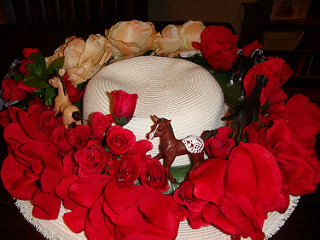

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
batch_size = 32
img_height = 130
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, #veri
    validation_split = 0.2, #train valid bolunur
    subset = "training", #ele alinan alt kume egitim kumesidir
    seed=42, #random degeri
    image_size = (img_height, img_width), #goruntu
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
   data_dir, #veri
    validation_split = 0.2, #train valid bolunur
    subset = "validation", #ele alinan alt kume egitim kumesidir
    seed=123, #random degeri
    image_size = (img_height, img_width), #goruntu
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


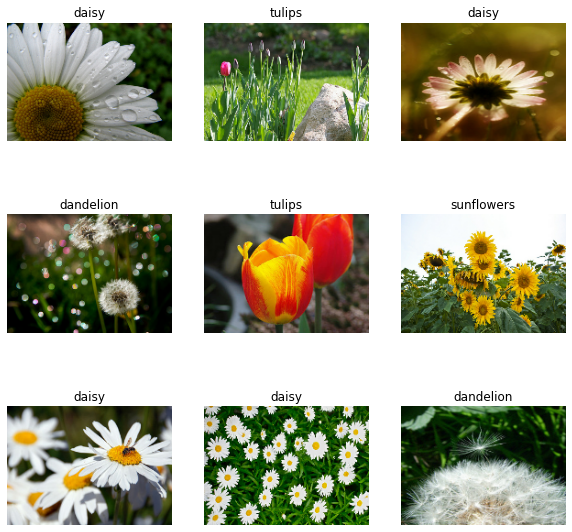

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 130, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
# MODELIINCALISMASI SUREECINDE BELLEK YONETIMINI OPTIMIZE ETMEK YARDIMCI PARAMETREDIR
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = 5
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)

])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
92/92 [==============================] - 101s 1s/step - loss: 1.8220 - accuracy: 0.1740 - val_loss: 1.6094 - val_accuracy: 0.1757
Epoch 2/10
92/92 [==============================] - 96s 1s/step - loss: 1.6094 - accuracy: 0.1792 - val_loss: 1.6094 - val_accuracy: 0.1757
Epoch 3/10
92/92 [==============================] - 91s 987ms/step - loss: 1.6094 - accuracy: 0.1792 - val_loss: 1.6094 - val_accuracy: 0.1757
Epoch 4/10
92/92 [==============================] - 91s 987ms/step - loss: 1.6094 - accuracy: 0.1792 - val_loss: 1.6094 - val_accuracy: 0.1757
Epoch 5/10
92/92 [==============================] - 91s 989ms/step - loss: 1.6094 - accuracy: 0.1792 - val_loss: 1.6094 - val_accuracy: 0.1757
Epoch 6/10
92/92 [==============================] - 91s 994ms/step - loss: 1.6094 - accuracy: 0.1792 - val_loss: 1.6094 - val_accuracy: 0.1757
Epoch 7/10
92/92 [==============================] - 94s 1s/step - loss: 1.6094 - accuracy: 0.1792 - val_loss: 1.6094 - val_accuracy: 0.1757
Epoch 8